<a href="https://colab.research.google.com/github/Novita20/PCVK_GANJIL_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum Pengolahan Citra Visi Komputer (PCVK) - Pertemuan 10 (Global Thresholding)**

**Nama  : Novita Dwi Rahmadani**

**Kelas : TI-3F**

**NIM   : 2141720050**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

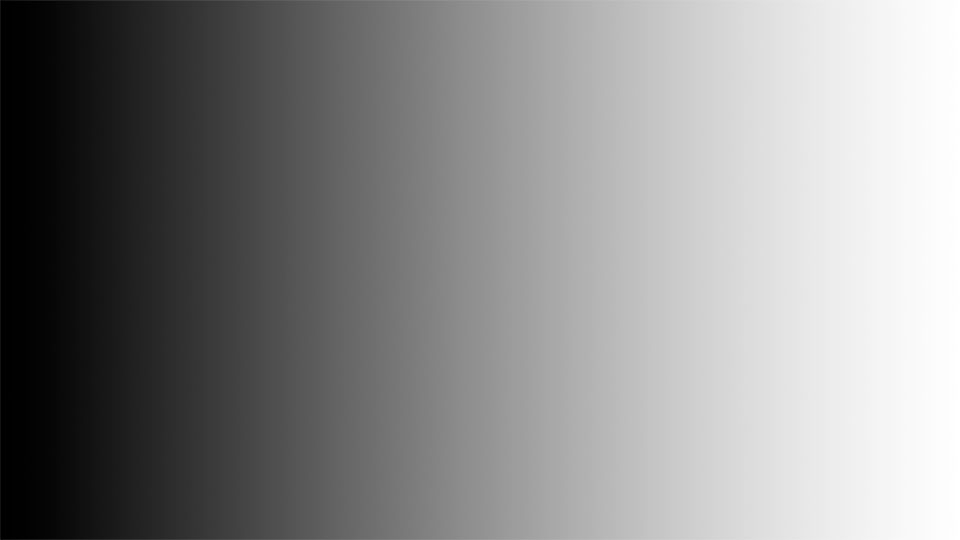

In [ ]:
input_image = cv.imread('/content/drive/MyDrive/PCVK/Images/dataset/gradient.jpg')
cv2_imshow(input_image)

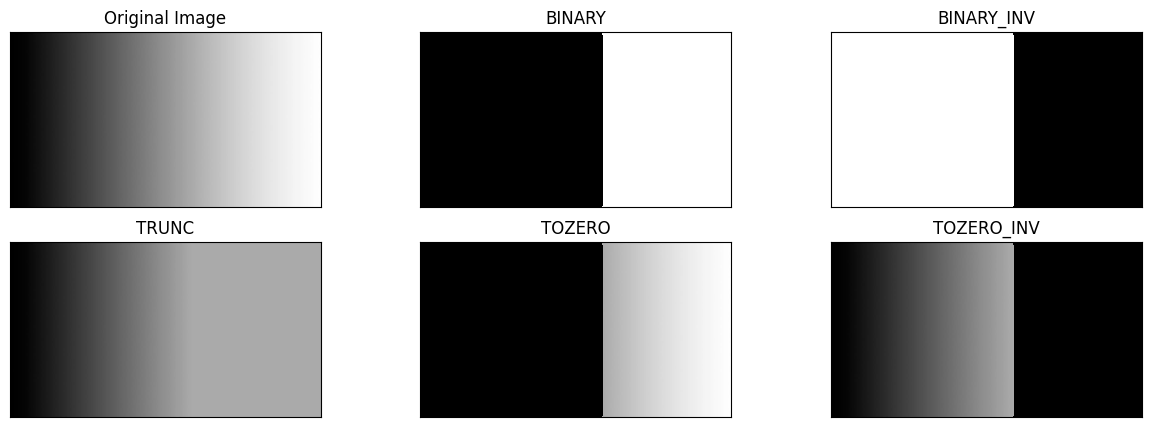

In [ ]:
# Global Threshold
# Output image
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Thresholding
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

### **Adaptive Threshold**

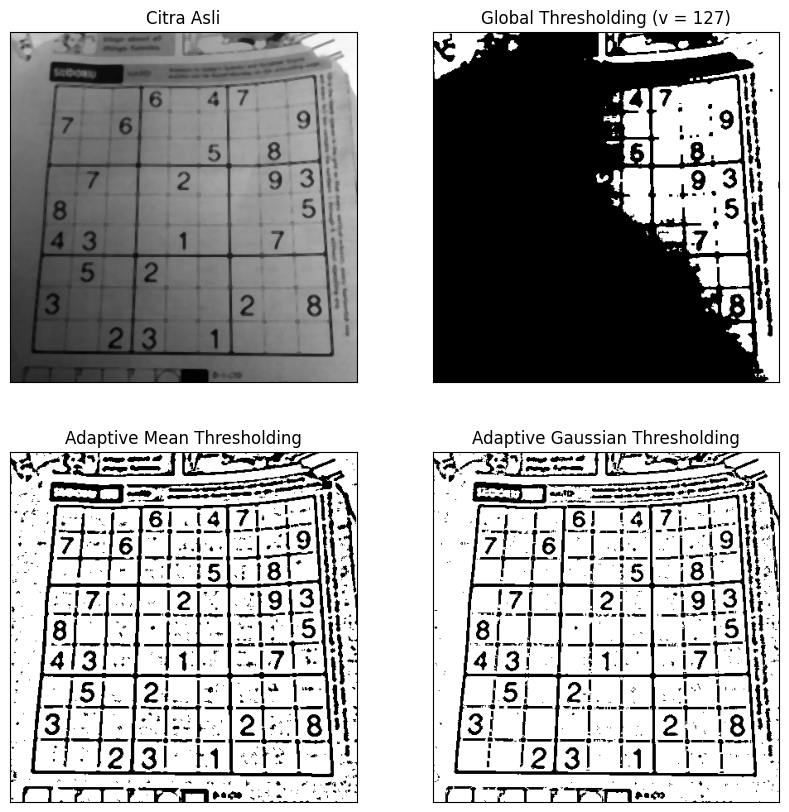

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/dataset/sudoku-original.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)
thresh = 127
ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
, cv.THRESH_BINARY,11,2)
titles = ['Citra Asli', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
 plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### **Otsu's Threshold**

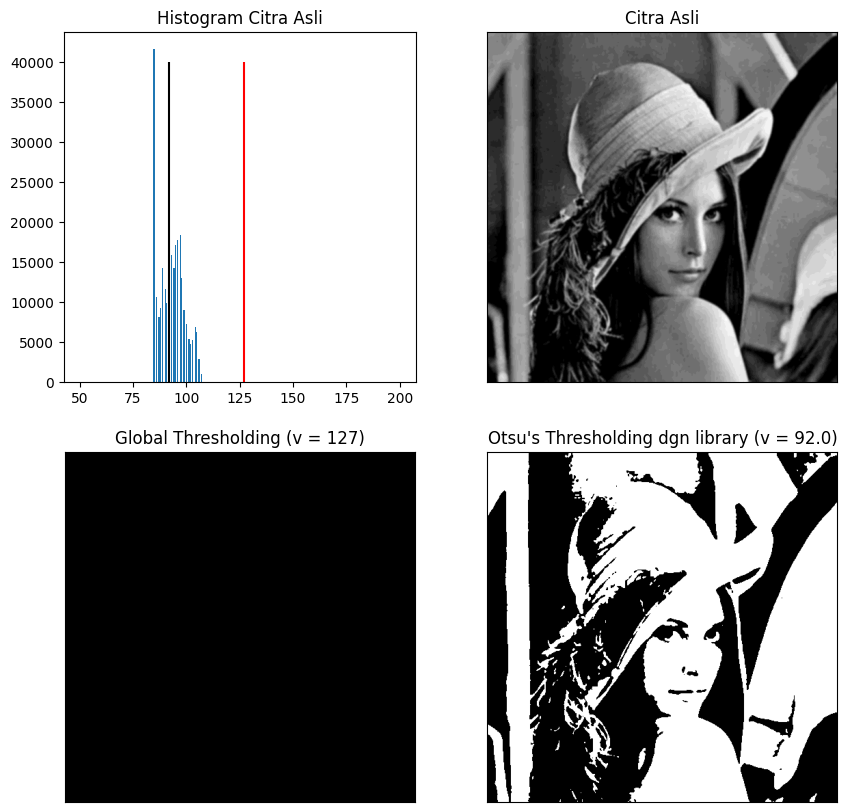

In [ ]:
# Dengan Library
filename = ('/content/drive/MyDrive/PCVK/Images/dataset/lena_gs_lc2.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127
ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red') #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black') #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
 plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
 plt.title(titles[i])
 plt.xticks([]),plt.yticks([])
plt.show()

### **Gaussian Filter**

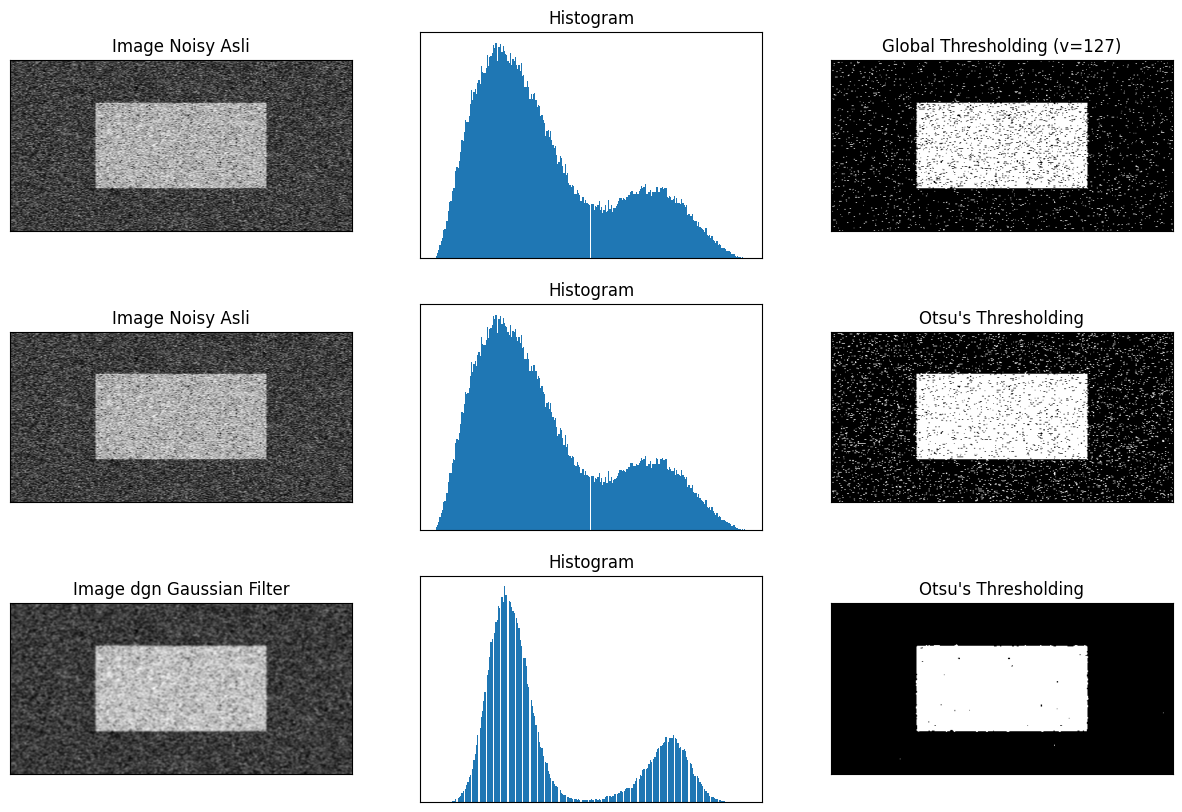

In [ ]:
filename = ('/content/drive/MyDrive/PCVK/Images/dataset/noisy2.png')
img = cv.imread(filename,0)
#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
 img, 0, th2,
 blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
 'Image Noisy Asli','Histogram',"Otsu's Thresholding",
 'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
 plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
 plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
 plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
 plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
 plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

### **Sementasi Citra menggunakan K-Means**

(<Axes: >, <matplotlib.image.AxesImage at 0x79e850ca13f0>)

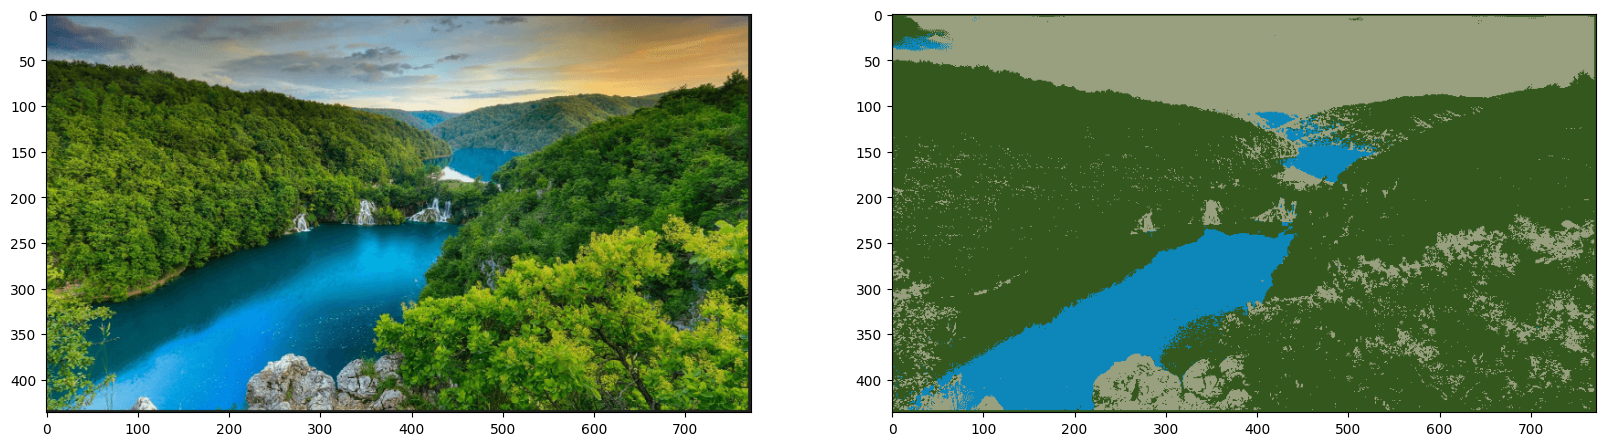

In [ ]:
#KMeans Image Segmentation
filename = ('/content/drive/MyDrive/PCVK/Images/dataset/jungle.png')
img = cv.imread(filename)
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
'''
kita akan menggunakan fungsi cv.kmeans() yang meminta array 2D sebagai masu
kan, sedangkan image aslinya adalah array 3D
selanjutnya kita perlu melakukan flattening array image masukan
'''
#reshape array ke bentuk 2D
pixel_values = img.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)
'''
syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu
banyak pergeseran posisi antara interasi sekarang
dengan iterasi sebelumnya (konvergen). Karena jumlah data yang besar, maka
kita akan hentikan iterasi saat jumlah iterasi = 100
atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di ite
rasi sebelumnya) < 0.2
'''
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)
'''
jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan
 putih/orange). untuk percobaan ini kita akan gunakan
3 cluster untuk image ini
'''
k = 3
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
#konversi titik centroid kedalam integer
centers = np.uint8(centers)
#flattening label array
labels = labels.flatten()
#konversi warna pixel asli kewarna dari tiap centroidnya
segmented_image = centers[labels.flatten()]
# reshape ke bentuk image asli
segmented_image = segmented_image.reshape(img.shape)
plt.figure(figsize = (20,20))
plt.subplot(1,2,1),plt.imshow(img)
plt.subplot(1,2,2),plt.imshow(segmented_image)

Mengubah warna pada cluster tertentu

(<Axes: >, <matplotlib.image.AxesImage at 0x79e850b1c310>)

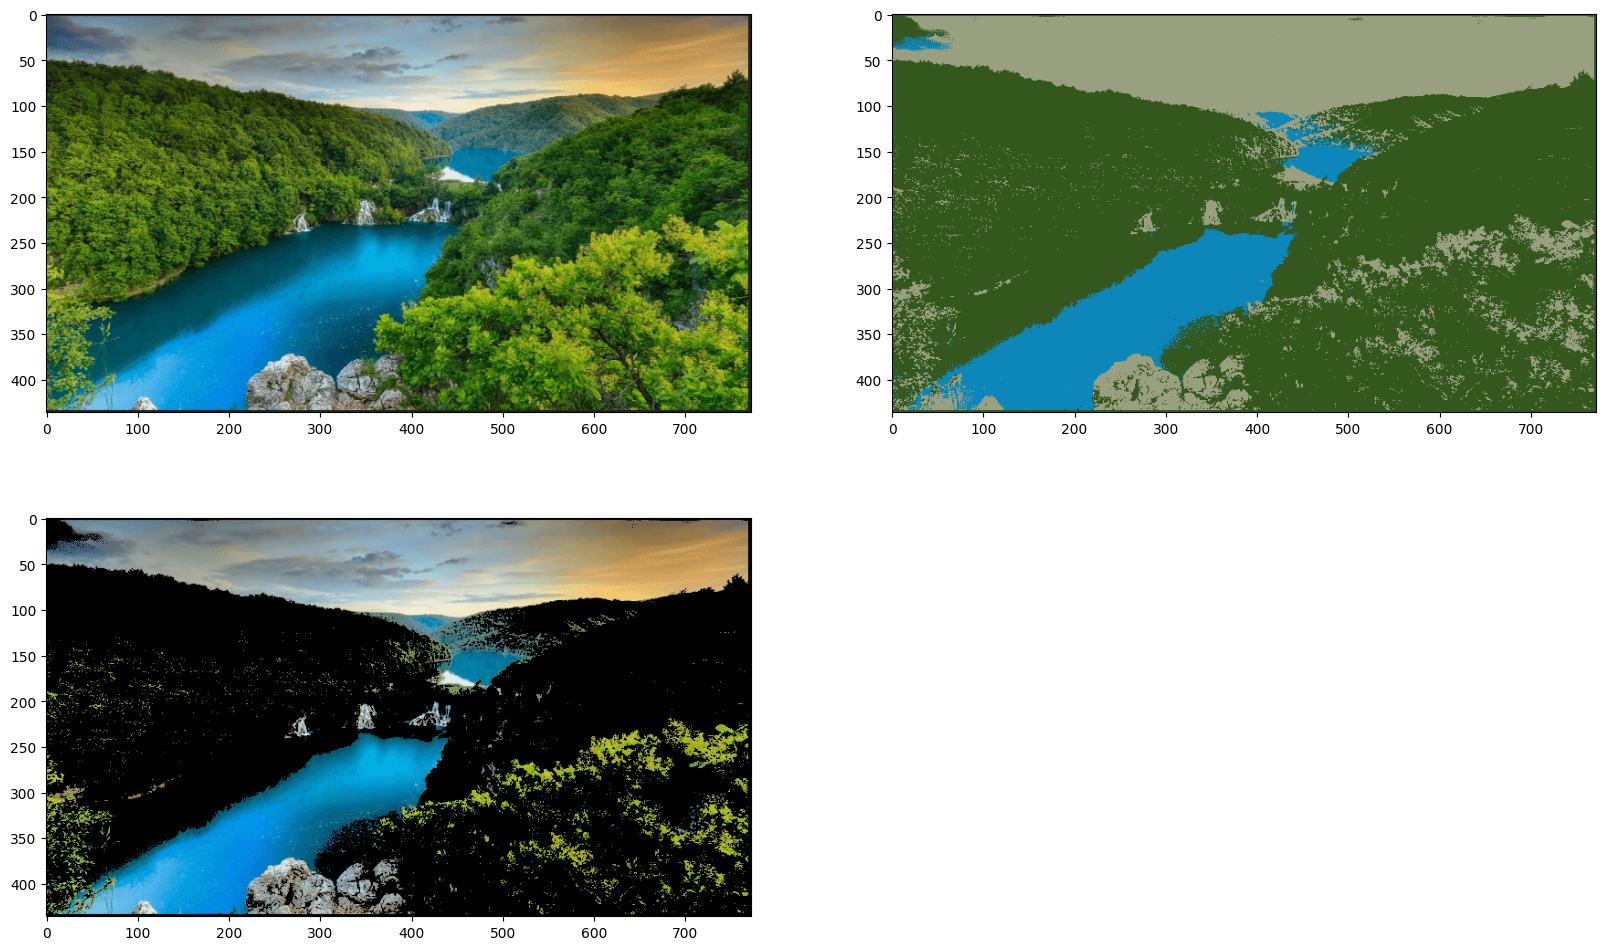

In [ ]:
# ubah pixel di cluster 2 menjadi hitam
masked_image = np.copy(img)
# konvert ke bentuk vektor
masked_image = masked_image.reshape((-1, 3))
# cluster yang diubah
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# konvert ke bentuk asli
masked_image = masked_image.reshape(img.shape)
plt.figure(figsize = (20,12))
plt.subplot(2,2,1),plt.imshow(img)
plt.subplot(2,2,2),plt.imshow(segmented_image)
plt.subplot(2,2,3),plt.imshow(masked_image)

### **Tugas Praktikum**

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week10.ipynb”.

2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [ ]:
pip install pytesseract

In [ ]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
bawah.

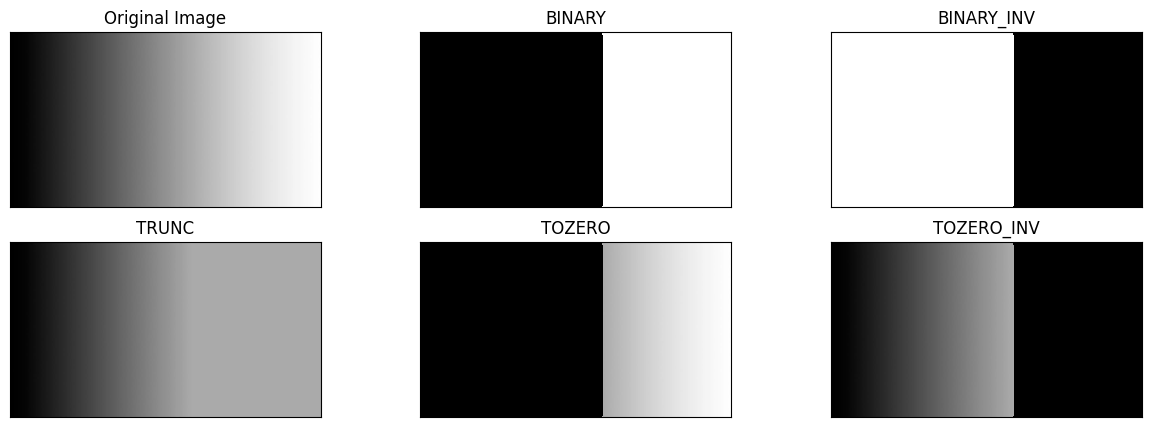

In [ ]:
# Global Threshold
# Output image
thresh1 = input_image.copy()
thresh2 = input_image.copy()
thresh3 = input_image.copy()
thresh4 = input_image.copy()
thresh5 = input_image.copy()
titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [input_image, thresh1, thresh2, thresh3, thresh4, thresh5]

# Thresholding
thresh = 170

def globalthreshold(threshold, img, type):
  for i in range(input_image.shape[0]):
    for j in range(input_image.shape[1]):
      for c in range(input_image.shape[2]):
        # Binary Threshold
        if(type == 1):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 255
          else:
            img[i,j,c] = 0
        # Binary-Inverted Threshold
        elif(type == 2):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = 255
        # Truncate Threshold
        elif(type == 3):
          if(img[i,j,c] > threshold):
            img[i,j,c] = threshold
          else:
            img[i,j,c] = img[i,j,c]
        # Threshold To Zero
        elif(type == 4):
          if(img[i,j,c] > threshold):
            img[i,j,c] = img[i,j,c]
          else:
            img[i,j,c] = 0
        # Threshold To Zero – Inverted
        elif(type == 5):
          if(img[i,j,c] > threshold):
            img[i,j,c] = 0
          else:
            img[i,j,c] = img[i,j,c]
  return img

# Memanggil fungsi globalThreshold
for a in range(1, len(images)):
  images[a] = globalthreshold(thresh, images[a], a)

#Membuat figure
plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])
plt.show()

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
ktp Riyanto.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

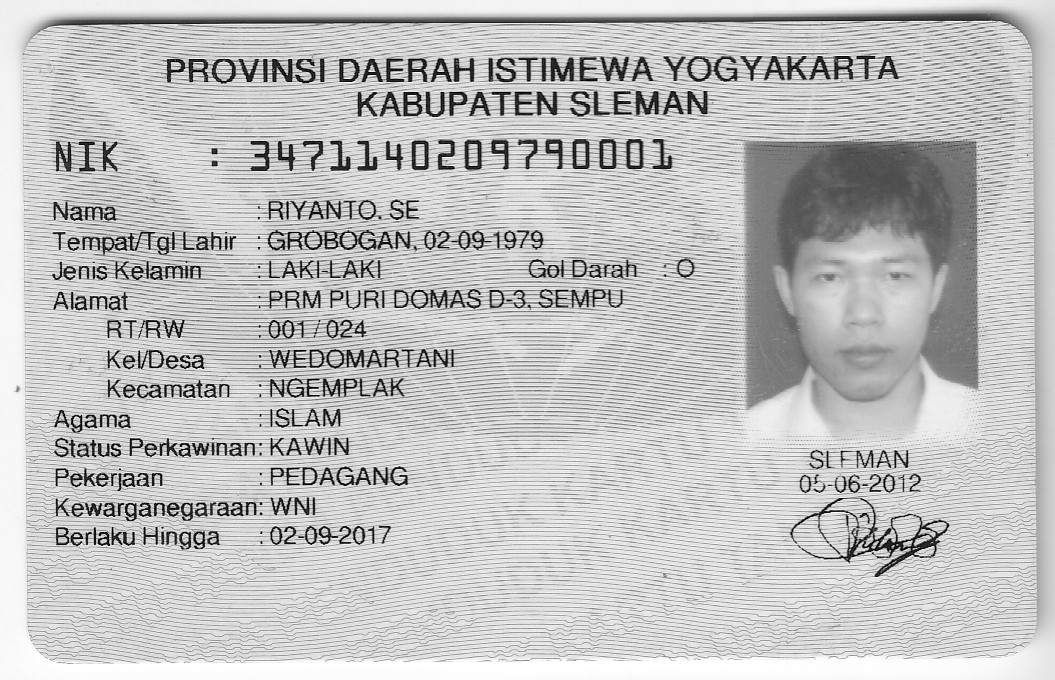

In [ ]:

img_ktp = cv.imread('/content/drive/MyDrive/PCVK/Images/dataset/ktp/Salinan ktp.png',0)
cv2_imshow(img_ktp)

<ipython-input-14-13a89485c439>:18: RuntimeWarning: invalid value encountered in divide
  mb = sumb / wb


<Figure size 1500x500 with 0 Axes>

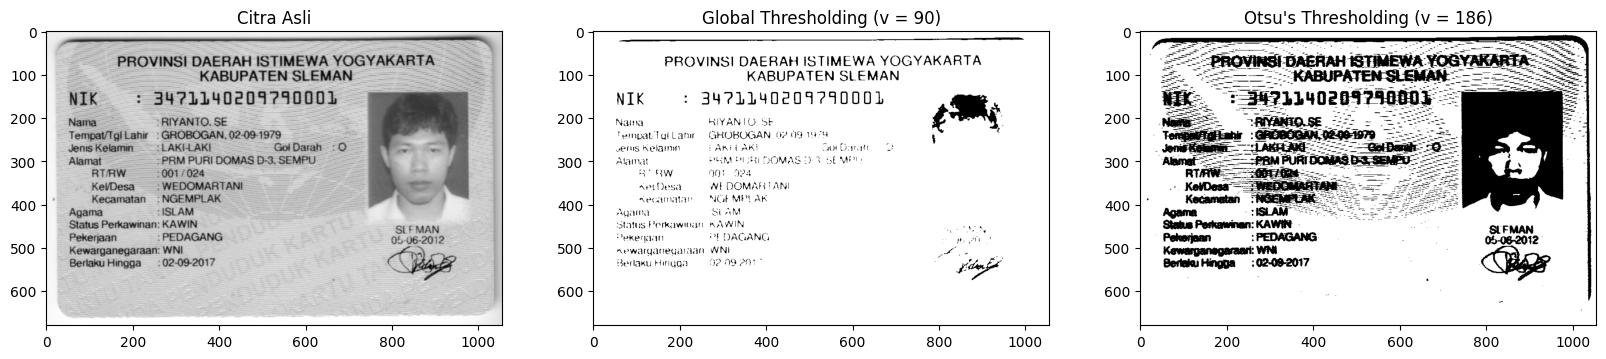

In [ ]:
#  Otsu Thresholding
# Hitung nilai threshold menggunakan Otsu Thresholding secara manual
img_ktp = cv. GaussianBlur (img_ktp, (5,5),0)

histogrm = cv.calcHist([img_ktp],[0],None,[256], [0,256])
hist_norm = histogrm.ravel()/histogrm.max()
Q = hist_norm.cumsum()
bins = np.arange (256)
wb = 0
sumb = 0
variationmax = 0
fn_min = np.inf
thresh = -1
for i in range(0,187):
  wb += histogrm[i]
  wf = (img_ktp.shape[0]*img_ktp.shape[1]) - wb
  sumb += (i*histogrm[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  varbetween = wb * wf * (mb - mf) * (mb - mf)
  if (varbetween>variationmax):
    variationmax = varbetween
    thresh = i
x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(img_ktp, 90, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (img_ktp, thresh, 255, cv. THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 90)', x]
citra3 = [img_ktp, th1, th2]
plt.figure(figsize = (15,5))

plt. figure(figsize = (20,15))
for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
plt.show()

5.Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image

saja. Gunakan image ktp Riyanto.jpg yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

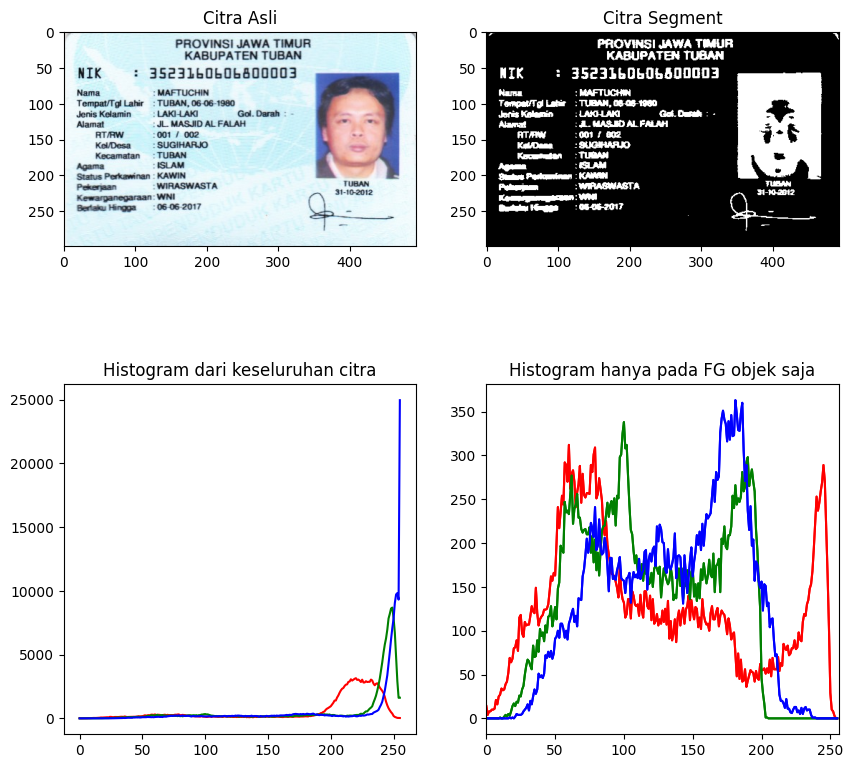

In [ ]:
# Histogram dari citra tersegmentasi
# load image in BGR format
img = cv.imread('/content/drive/MyDrive/PCVK/Images/dataset/ktp/Salinan ktp3.png')
img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')
for i,col in enumerate(color):
    hist0 = cv.calcHist([img],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])
plt.show()